데이터가 다음과 같이 주어졌을 때:

* x: [1,2],[1,4],[1,6]

* y: 3,6,7



회귀식을 도출해보자.

* 1) matrix inverse method로 계수를 계산하고 출력,

* 2) 예측과 실제의 오류 합계를 계산하고 출력,

* 3) 입력 데이터와 회귀선의 그래프를 작성한다.



* 제출: ipynb 파일 1개 (zip하지 마세요).

* 기한: 2021/11/23 화 22:00시

In [2]:
import numpy as np

# 앞에는 상수항, 뒤에는 x1
x1=np.array([[1,2],[1,4],[1,6]])

y1=np.array([3,6,7])

print(x1.shape,y1.shape)

(3, 2) (3,)


In [3]:
print("x1: \n", x1)

x1: 
 [[1 2]
 [1 4]
 [1 6]]


# 1) matrix inverse method로 계수를 계산하고 출력,

In [20]:
w0, w1=np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1)) 

In [21]:
f"w0:{w0} w1:{w1}"

'w0:1.3333333333333286 w1:1.0'

# 2) 예측과 실제의 오류 합계를 계산하고 출력

In [22]:
x=x1[:,1]  #[2, 4, 6]
yhat=x*w1+w0
f"predicted yhat: {yhat}"

'predicted yhat: [3.33333333 5.33333333 7.33333333]'

In [23]:
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2))))

SSE sum of squared errors: 0.6666666666666666


# 3) 입력 데이터와 회귀선의 그래프를 작성한다.

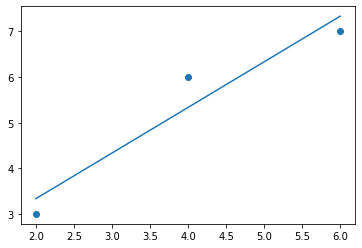

In [24]:
ㅠ

# 풀이

In [5]:
# 풀이

# Dot proudct: 내적 계산 https://tartist.tistory.com/81
# x1.T 90도 회전
# 2 by 3 와 3 by 2의 닷 계산
# 중간의 3가 생략된다. 2 by 2 가 된다
# 2 by 2로 만드는 이유는 w0, w1 2개 필요한데 2로 시작하는 숫자가 필요하다.
xTx = np.dot(x1.T, x1)
print("xTx=\n", xTx)

xTx=
 [[ 3 12]
 [12 56]]


In [6]:
# invserse 된 값 구함
xTxI = np.linalg.inv(xTx)
print("xTxI=\n", xTxI)

xTxI=
 [[ 2.33333333 -0.5       ]
 [-0.5         0.125     ]]


In [8]:
xTyT = np.dot(x1.T, y1)
xTyT

array([16, 72])

In [11]:
# 2 by 2 와 2 by 1 의 닷
# 2 by 1 결과 
print("weight=", np.dot(xTxI, xTyT))

weight= [1.33333333 1.        ]


In [13]:
# x0, x1에 대한 계수
# 계수: 변수(문자)에 일정하게 곱해진 상수(숫자)이다.
# 방정식에서 변수 이외의 부분 즉, 나머지 인수 전체를 의미한다
w0, w1 = np.dot(xTxI, xTyT)
print("w0, w1", w0, w1)

w0, w1 1.3333333333333286 1.0


## matrix 로 직접계산

In [16]:
X=np.array([[1,2],[1,4],[1,6]])
Y=np.array([3,6,7])

In [18]:
xTx=X.T*X

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [19]:
# linear algebra(대수) 
# list square (최소 제곱법) lstsq 최소 제곱 해를 선형 행렬 방정식으로 반환합니다.

# w0, w1 을 구했다면? 회식을 모델링해서 구했다는 의미
# 예측하는 라인, 실제 값은 Y가 실제데이터
w0, w1 = np.linalg.lstsq(x1, y1, rcond=None)[0]

### 예측

In [20]:
# 상수항 데이터는 필요 없고, x1 데이터만 필요하다.
# x1 절편, y1 기울기가 된다.
# 그래프에 상수는 없음, X1 만 나타남 -> 예측값을 정할 때에는 앞에 있는 상수항은 제거하고 
# X1만 별또로 저장해서 회귀식에 넣어서 예측값을 구한다.

#### 항목별로 예측

In [21]:
# 상수항 제거하고 속삼나 꺼냄
x=x1[:, 1]
x

array([2, 4, 6])

In [24]:
# yhat -> 예측값, x항목별로 분석
yhat = w0+w1*x
f"predicated yhat: {yhat}"

'predicated yhat: [3.33333333 5.33333333 7.33333333]'

#### 벡터, matrixfh 예측


shape 정렬

In [28]:
#shape 정렬

# w 를 array 로 만듬
w = np.array([w0, w1])

f"x1.shape:{x1.shape} w.shape:: {w.shape}"

'x1.shape:(3, 2) w.shape:: (2,)'

In [29]:
# x1, w의 dot 연산을 위해 차원, shape 를 맞춰준다. 

# 1차원 Transpose
# []형식을 [[], []] 형식으로 만들어서 transpose 해줘야한다. 
# : 모든 데이터 가져오기
w=w[:, np.newaxis]
f"w.shpape: {w.shape}"

'w.shpape: (2, 1)'

In [30]:
w

array([[1.33333333],
       [1.        ]])

예측 계산

In [32]:
# 위처럼 항목별로 계산 할때는 식을 만들어서 했다. W0+W1*x
# 행렬로 간단한게 해본다

# dot 연산으로 예측값 바로구할 수 있다
pred=np.dot(x1, w)
f"predicated yhat: {pred}"

'predicated yhat: [[3.33333333]\n [5.33333333]\n [7.33333333]]'

In [33]:
# 오류를 구하기 위해 Y1 데이터도 차원을 맞춰야 한다.
# y1 역시 차원을 맞추어 예측, 뺼셈 연산이 가능하도록 만들자
_y1 = y1[:, np.newaxis]
_y1

array([[3],
       [6],
       [7]])

In [35]:
# y1에 예측 값 빼주기, 오류 구했다. 
_y1 - pred

array([[-0.33333333],
       [ 0.66666667],
       [-0.33333333]])

# 오류 계산
- 오류는 여러 오류가 있따 
- 1.실제 - 예측 - 절대값으로 구하기 
- 2.실제 - 예측 - square(power

### 우리는 SSE(Sum of squred errors) 를 구한다.

In [36]:
# 전체 오류의 제곱의 합계는 0.67 이네
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2))))

SSE sum of squared errors: 0.6666666666666667


In [37]:
print("i\t오류 \ty\t예측")
# 반복문으로 계산
for i in range(len(x1)):
    predicted = w0*x1[i][0] + w1*w1[i][1]
    error = y1[i]-predicted
    print("{0:2d}\t{1:.2f} =\t {2} - \t{3:.2f}".format(i, error, y1[i], predicted))

i	오류 	y	예측


IndexError: invalid index to scalar variable.

predicated yhat: [3.33333333 5.33333333 7.33333333]
SSE sum of squared errors: 0.6666666666666666


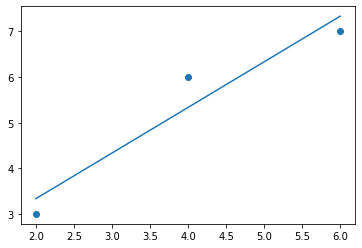

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# (1) data ready
x1=np.array([[1, 2], [1,4], [1,6]])
y1=np.array([3,6,7])

# (2) shape is right already (colum:x0, x1 row:records)
# {3} compute w (w0 for x0, w1 for x1)
# list 스퀘어 방식으로 구하는 방법도 있음 
# w0,w1=np.linglg.lstsq(x1, y1, rcond=NONE)[0]
w0, w1=np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

# (4) predicated
x=x1[:, 1] #계수들만 가져옴
yhat=w0+w1*x
print("predicated yhat: {}".format(yhat))

# (5)error
print("SSE sum of squared errors: {}".format(np.sum(np.power(yhat-y1,2))))

# (6) graph
fig=plt.figure()
# 행 첫번째 열 첫번째의 1번째
ax=fig.add_subplot(111)

# 스캐터, x축이 x계수, y축이 값
ax.scatter(x, y1)
# 선그래프, 회귀선 x축이 x계수, y축이 예측
ax.plot(x, yhat)